In [1]:
import nltk
import os
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

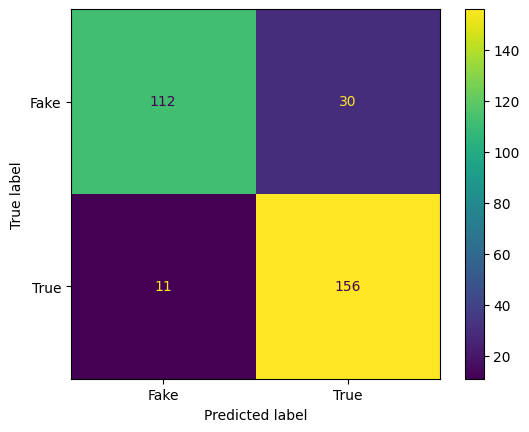

In [14]:
from utils import LABELS
data = pd.read_json('data/base/pred_final.json')
name = 'figures/baseline'
if not os.path.exists(name):
    os.makedirs(name)

# Calculate the confusion matrix
y_true = data['category']
y_pred = data['predictions']
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
ConfusionMatrixDisplay(cm, display_labels=LABELS.keys()).plot()
plt.show()

In [408]:
print('False fake:',list(data[(data['category'] == 'True') & (data['predictions'] == 'Fake')]['id'].values))
print('False true:',list(data[(data['category'] == 'Fake') & (data['predictions'] == 'True')]['id'].values))

False fake: ['fncs_test_563', 'fncs_test_181', 'fncs_test_478', 'fncs_train_587', 'fncs_dev_282', 'fncs_train_41', 'fncs_test_483', 'fncs_test_284', 'fncs_test_350', 'fncs_train_27', 'fncs_train_646', 'fncs_dev_125']
False true: ['fncs_dev_44', 'fncs_train_151', 'fncs_train_161', 'fncs_train_643', 'fncs_test_238', 'fncs_train_388', 'fncs_test_505', 'fncs_test_363', 'fncs_test_477', 'fncs_dev_233', 'fncs_train_475', 'fncs_test_320', 'fncs_dev_60', 'fncs_test_353', 'fncs_dev_292', 'fncs_train_647', 'fncs_test_532', 'fncs_test_72', 'fncs_test_508', 'fncs_train_541', 'fncs_dev_116', 'fncs_test_140', 'fncs_train_263', 'fncs_dev_107', 'fncs_test_401', 'fncs_test_179', 'fncs_test_196', 'fncs_dev_108', 'fncs_test_74', 'fncs_train_187']


In [2]:
base_tf = ['fncs_test_563', 'fncs_test_181', 'fncs_test_478', 'fncs_train_587', 'fncs_dev_282', 'fncs_train_41', 'fncs_test_483', 'fncs_test_284', 'fncs_test_350', 'fncs_train_27', 'fncs_train_646', 'fncs_dev_125']
base_ft = ['fncs_dev_44', 'fncs_train_151', 'fncs_train_161', 'fncs_train_643', 'fncs_test_238', 'fncs_train_388', 'fncs_test_505', 'fncs_test_363', 'fncs_test_477', 'fncs_dev_233', 'fncs_train_475', 'fncs_test_320', 'fncs_dev_60', 'fncs_test_353', 'fncs_dev_292', 'fncs_train_647', 'fncs_test_532', 'fncs_test_72', 'fncs_test_508', 'fncs_train_541', 'fncs_dev_116', 'fncs_test_140', 'fncs_train_263', 'fncs_dev_107', 'fncs_test_401', 'fncs_test_179', 'fncs_test_196', 'fncs_dev_108', 'fncs_test_74', 'fncs_train_187']
back_tf = ['fncs_test_563', 'fncs_test_181', 'fncs_train_587', 'fncs_train_660', 'fncs_train_41', 'fncs_train_407', 'fncs_dev_112', 'fncs_test_483', 'fncs_test_284', 'fncs_train_646', 'fncs_test_253', 'fncs_dev_206']
back_ft = ['fncs_dev_44', 'fncs_train_151', 'fncs_train_643', 'fncs_test_238', 'fncs_train_388', 'fncs_test_505', 'fncs_test_363', 'fncs_test_477', 'fncs_train_475', 'fncs_test_320', 'fncs_train_460', 'fncs_dev_60', 'fncs_test_353', 'fncs_dev_292', 'fncs_dev_224', 'fncs_test_532', 'fncs_test_72', 'fncs_train_541', 'fncs_test_140', 'fncs_dev_107', 'fncs_test_401', 'fncs_train_659', 'fncs_test_179', 'fncs_test_50', 'fncs_train_624', 'fncs_test_74', 'fncs_test_285']

print(f'False Fake: \n\tBASE{set(base_tf) & set(back_tf)}\n\tFINAL{set(back_tf) & set(base_tf)}')
print(f'False True: \n\tBASE{set(base_ft) & set(back_ft)}\n\tFINAL{set(back_ft) & set(base_ft)}')

False Fake: 
	BASE{'fncs_test_284', 'fncs_test_563', 'fncs_train_646', 'fncs_train_41', 'fncs_test_181', 'fncs_test_483', 'fncs_train_587'}
	FINAL{'fncs_test_284', 'fncs_test_563', 'fncs_train_646', 'fncs_train_41', 'fncs_test_181', 'fncs_test_483', 'fncs_train_587'}
False True: 
	BASE{'fncs_test_72', 'fncs_test_238', 'fncs_train_151', 'fncs_test_140', 'fncs_test_74', 'fncs_test_532', 'fncs_train_475', 'fncs_dev_292', 'fncs_test_179', 'fncs_test_320', 'fncs_dev_44', 'fncs_test_363', 'fncs_dev_107', 'fncs_dev_60', 'fncs_train_643', 'fncs_test_353', 'fncs_train_388', 'fncs_train_541', 'fncs_test_505', 'fncs_test_401', 'fncs_test_477'}
	FINAL{'fncs_test_72', 'fncs_test_238', 'fncs_train_151', 'fncs_test_140', 'fncs_test_74', 'fncs_test_532', 'fncs_train_475', 'fncs_dev_292', 'fncs_test_179', 'fncs_test_320', 'fncs_dev_44', 'fncs_test_363', 'fncs_dev_107', 'fncs_dev_60', 'fncs_train_643', 'fncs_test_353', 'fncs_train_388', 'fncs_train_541', 'fncs_test_505', 'fncs_test_401', 'fncs_test_477'

In [395]:
from utils import NamedEntityMasker

masker = NamedEntityMasker(['PER','ORG'])
data['text'] = data['text'].apply(lambda x: masker(x) if x else None)
data['headline'] = data['headline'].apply(lambda x: masker(x) if x else None)

## Bag of words

In [410]:
tt, tf, ft, ff = [], [], [], []

for i in range(len(data)):
    words = nltk.word_tokenize(data['text'][i].lower()) if data['text'][i] else []
    words += nltk.word_tokenize(data['headline'][i].lower()) if data['headline'][i] else []
    if data['category'][i] == 'True':
        if data['predictions'][i] == 'True':
            tt.extend(words)
        else:
            tf.extend(words)
    else:
        if data['predictions'][i] == 'True':
            ft.extend(words)
        else:
            ff.extend(words)

In [411]:
def get_top(words, stop_words, title, n=10):
    freq = nltk.FreqDist(words)
    stop_words += ['.', ',', '(', ')', '!', '?', ':', ';', '...', '``', "''","'",'*', '—', '–', '’', '“', '”', '‘', '…', '«', '»', 'el','la','los','las','El','La','Los','Las']
    stop_words += ['number','per','org']
    for word in stop_words:
        del freq[word]
    freq.plot(n, title=title, percents=True, show=False)
    return freq.most_common(n)

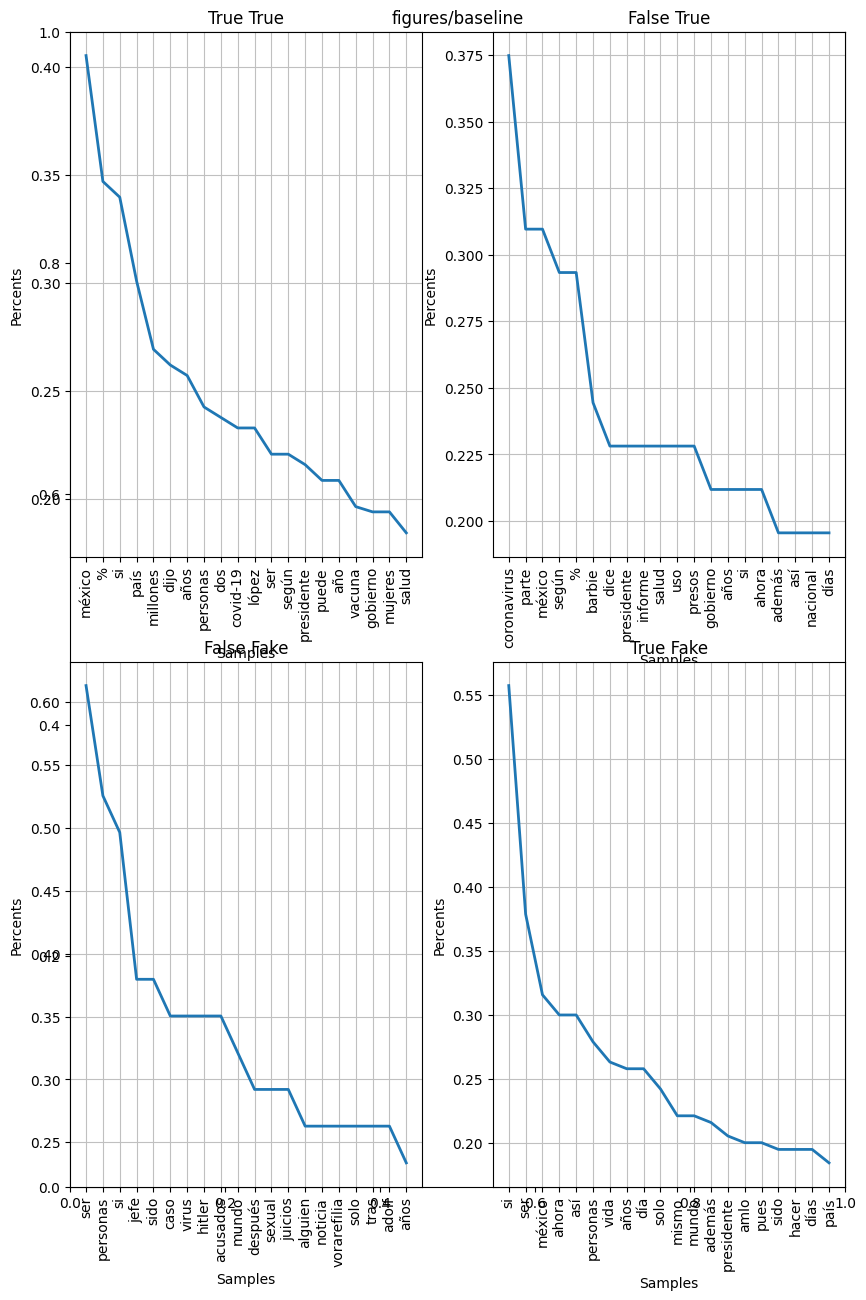

True True: [('méxico', 167), ('%', 143), ('si', 140), ('país', 124), ('millones', 111), ('dijo', 108), ('años', 106), ('personas', 100), ('dos', 98), ('covid-19', 96), ('lópez', 96), ('ser', 91), ('según', 91), ('presidente', 89), ('puede', 86), ('año', 86), ('vacuna', 81), ('gobierno', 80), ('mujeres', 80), ('salud', 76)]
False True: [('coronavirus', 23), ('parte', 19), ('méxico', 19), ('según', 18), ('%', 18), ('barbie', 15), ('dice', 14), ('presidente', 14), ('informe', 14), ('salud', 14), ('uso', 14), ('presos', 14), ('gobierno', 13), ('años', 13), ('si', 13), ('ahora', 13), ('además', 12), ('así', 12), ('nacional', 12), ('días', 12)]
True False: [('ser', 21), ('personas', 18), ('si', 17), ('jefe', 13), ('sido', 13), ('caso', 12), ('virus', 12), ('hitler', 12), ('acusados', 12), ('mundo', 11), ('después', 10), ('sexual', 10), ('juicios', 10), ('alguien', 9), ('noticia', 9), ('vorarefilia', 9), ('solo', 9), ('tras', 9), ('adolf', 9), ('años', 8)]
False False: [('si', 106), ('ser', 7

In [412]:
stopwords = nltk.corpus.stopwords.words("spanish")
n = 20 

plt.figure(figsize=(10,15))
plt.title(name)
plt.subplot(2, 2, 1)
top_tt = get_top(tt, stopwords, 'True True', n)

plt.subplot(2, 2, 2)
top_ft = get_top(ft, stopwords, 'False True', n)

plt.subplot(2, 2, 3)
top_tf = get_top(tf, stopwords, 'False Fake', n)

plt.subplot(2, 2, 4)
top_ff = get_top(ff, stopwords, 'True Fake', n)
plt.savefig(f'{name}/top_words.png')
plt.show()
print(f'True True: {top_tt}')
print(f'False True: {top_ft}')
print(f'True False: {top_tf}')
print(f'False False: {top_ff}')

### Diferencias entre ambos

In [413]:
back_tt = [('si', 147), ('%', 142), ('país', 122), ('personas', 109), ('millones', 109), ('dijo', 107), ('años', 106), ('dos', 98), ('ser', 95), ('méxico', 92), ('año', 87), ('puede', 86), ('presidente', 84), ('vacuna', 80), ('mujeres', 80), ('parte', 78), ('covid-19', 77), ('gobierno', 73), ('después', 73), ('aunque', 71)]
back_ft = [('si', 16), ('dice', 15), ('años', 15), ('mujeres', 15), ('parte', 14), ('sido', 13), ('uso', 13), ('según', 12), ('solo', 12), ('pasado', 12), ('series', 12), ('año', 11), ('covid-19', 11), ('twitter', 11), ('informe', 11), ('través', 11), ('varios', 11), ('actividad', 10), ('mundo', 10), ('lugar', 10)]
back_tf = [('sido', 16), ('ser', 16), ('jefe', 14), ('ley', 13), ('virus', 12), ('acusados', 12), ('gobierno', 11), ('juicios', 10), ('si', 9), ('cuatro', 9), ('noticia', 8), ('mujer', 8), ('años', 7), ('después', 7), ('personas', 7), ('países', 7), ('salud', 7), ('acusación', 7), ('dos', 6), ('mundo', 6)]
back_ff = [('si', 102), ('ser', 70), ('ahora', 64), ('personas', 53), ('así', 51), ('vida', 49), ('día', 46), ('años', 45), ('méxico', 43), ('solo', 41), ('mundo', 40), ('mismo', 40), ('pues', 40), ('presidente', 40), ('gobierno', 38), ('parte', 37), ('hacer', 37), ('días', 36), ('gente', 35), ('país', 35)]

base_tt = [('méxico', 167), ('%', 143), ('si', 140), ('país', 124), ('millones', 111), ('dijo', 108), ('años', 106), ('personas', 100), ('dos', 98), ('covid-19', 96), ('lópez', 96), ('ser', 91), ('según', 91), ('presidente', 89), ('puede', 86), ('año', 86), ('vacuna', 81), ('gobierno', 80), ('mujeres', 80), ('salud', 76)]
base_ft = [('coronavirus', 23), ('parte', 19), ('méxico', 19), ('según', 18), ('%', 18), ('barbie', 15), ('dice', 14), ('presidente', 14), ('informe', 14), ('salud', 14), ('uso', 14), ('presos', 14), ('gobierno', 13), ('años', 13), ('si', 13), ('ahora', 13), ('además', 12), ('así', 12), ('nacional', 12), ('días', 12)]
base_tf = [('ser', 21), ('personas', 18), ('si', 17), ('jefe', 13), ('sido', 13), ('caso', 12), ('virus', 12), ('hitler', 12), ('acusados', 12), ('mundo', 11), ('después', 10), ('sexual', 10), ('juicios', 10), ('alguien', 9), ('noticia', 9), ('vorarefilia', 9), ('solo', 9), ('tras', 9), ('adolf', 9), ('años', 8)]
base_ff = [('si', 106), ('ser', 72), ('méxico', 60), ('ahora', 57), ('así', 57), ('personas', 53), ('vida', 50), ('años', 49), ('día', 49), ('solo', 46), ('mismo', 42), ('mundo', 42), ('además', 41), ('presidente', 39), ('amlo', 38), ('pues', 38), ('sido', 37), ('hacer', 37), ('días', 37), ('país', 35)]

first = lambda l: [x[0] for x in l]
diffs = lambda l1, l2: set(l1) - set(l2)
print(f'True True: \n\tFINAL{diffs(first(back_tt), first(base_tt))}\n\tBASE{diffs(first(base_tt), first(back_tt))}')
print(f'False True: \n\tFINAL{diffs(first(back_ft), first(base_ft))}\n\tBASE{diffs(first(base_ft), first(back_ft))}')
print(f'True False: \n\tFINAL{diffs(first(back_tf), first(base_tf))}\n\tBASE{diffs(first(base_tf), first(back_tf))}')
print(f'False False: \n\tFINAL{diffs(first(back_ff), first(base_ff))}\n\tBASE{diffs(first(base_ff), first(back_ff))}')


True True: 
	FINAL{'parte', 'después', 'aunque'}
	BASE{'salud', 'según', 'lópez'}
False True: 
	FINAL{'través', 'mujeres', 'sido', 'twitter', 'covid-19', 'solo', 'año', 'series', 'lugar', 'mundo', 'pasado', 'actividad', 'varios'}
	BASE{'coronavirus', 'nacional', 'presos', 'salud', 'así', '%', 'ahora', 'además', 'barbie', 'méxico', 'presidente', 'gobierno', 'días'}
True False: 
	FINAL{'mujer', 'salud', 'ley', 'acusación', 'dos', 'gobierno', 'cuatro', 'países'}
	BASE{'sexual', 'vorarefilia', 'adolf', 'caso', 'hitler', 'solo', 'tras', 'alguien'}
False False: 
	FINAL{'gente', 'gobierno', 'parte'}
	BASE{'amlo', 'sido', 'además'}


## Longitud

In [414]:
def plot_hist(tt,tf,ft,ff, xlim=2500):
    plt.figure(figsize=(8, 8))
    plt.title(name)
    plt.subplot(2, 2, 1)
    plt.hist(tt, bins=20)
    plt.xlim(0, xlim)
    plt.title('True True')

    plt.subplot(2, 2, 2)
    plt.hist(tf, bins=6)
    plt.xlim(0, xlim)
    plt.title('False Fake')

    plt.subplot(2, 2, 3)
    plt.hist(ft, bins=12)
    plt.xlim(0, xlim)
    plt.title('False True')

    plt.subplot(2, 2, 4)
    plt.hist(ff, bins=20)
    plt.xlim(0, xlim)
    plt.title('True Fake')

### Cuerpo de la noticia

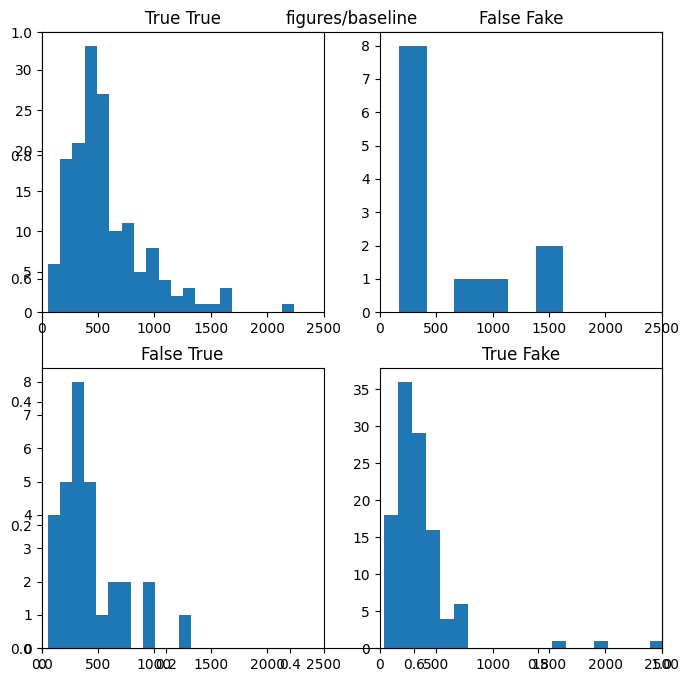

In [415]:
tt, tf, ft, ff = [], [], [], []
for i in range(len(data)):
    words = len(nltk.word_tokenize(data['text'][i])) if data['text'][i] is not None else 0
    if data['category'][i] == 'True':
        if data['predictions'][i] == 'True':
            tt.append(words)
        else:
            tf.append(words)
    else:
        if data['predictions'][i] == 'True':
            ft.append(words)
        else:
            ff.append(words)
plot_hist(tt,tf,ft,ff,xlim=2500)
plt.savefig(f'{name}/text_length.png')
plt.show()

### Título de la noticia

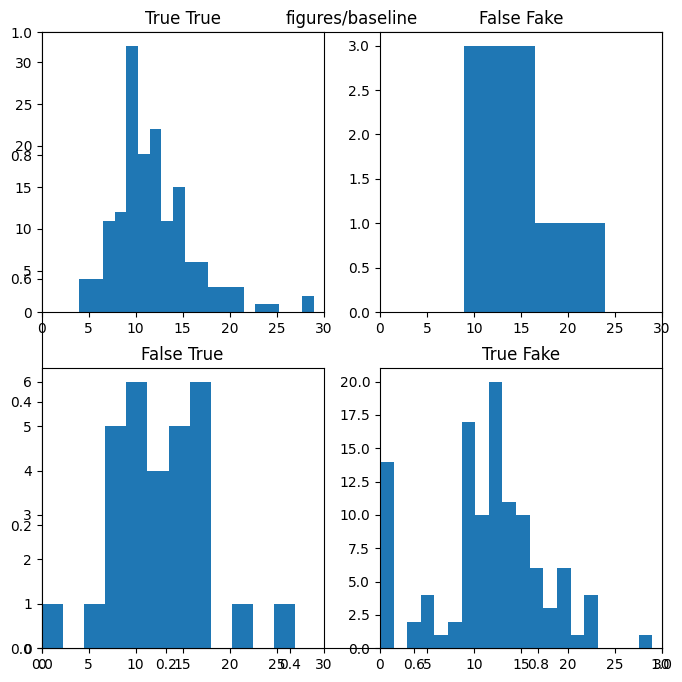

In [416]:
tt, tf, ft, ff = [], [], [], []
for i in range(len(data)):
    words = len(nltk.word_tokenize(data['headline'][i])) if data['headline'][i] is not None else 0
    if data['category'][i] == 'True':
        if data['predictions'][i] == 'True':
            tt.append(words)
        else:
            tf.append(words)
    else:
        if data['predictions'][i] == 'True':
            ft.append(words)
        else:
            ff.append(words)
plot_hist(tt,tf,ft,ff,xlim=30)
plt.savefig(f'{name}/headline_length.png')
plt.show()

## Temática

In [417]:
tt, tf, ft, ff = [], [], [], []
for i in range(len(data)):
    if data['category'][i] == 'True':
        if data['predictions'][i] == 'True':
            tt.append(data['topic'][i])
        else:
            tf.append(data['topic'][i])
    else:
        if data['predictions'][i] == 'True':
            ft.append(data['topic'][i])
        else:
            ff.append(data['topic'][i])

In [418]:
def count(l):
    res = {}
    for x in l:
        if x in res:
            res[x] += 1
        else:
            res[x] = 1
    return res

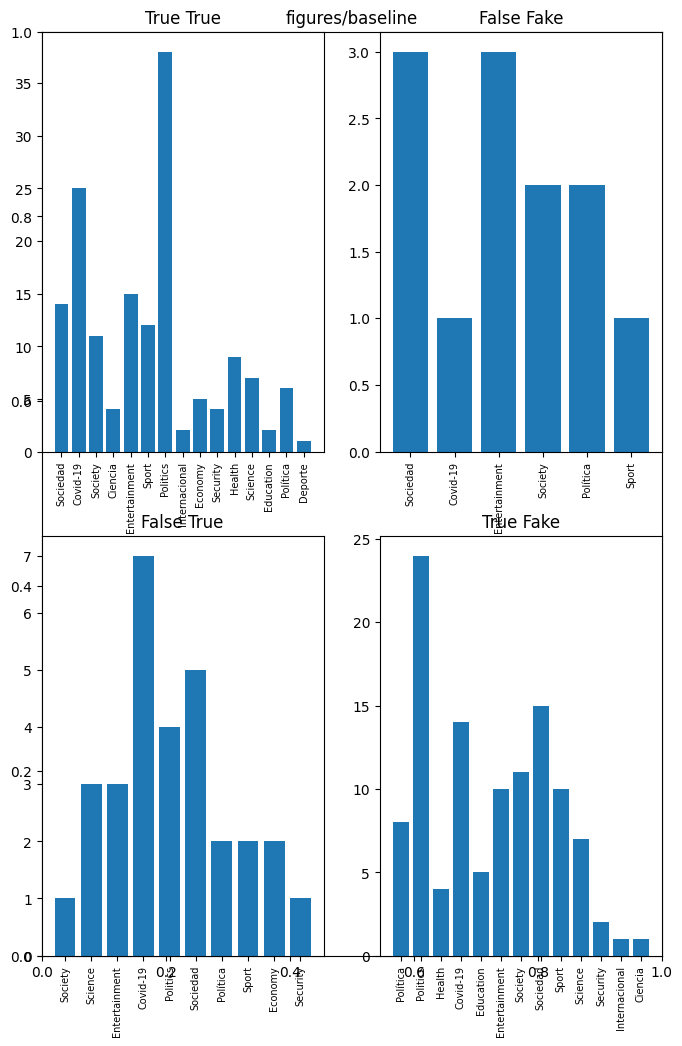

In [419]:
plt.figure(figsize=(8, 12))
plt.title(name)
plt.subplot(2, 2, 1)
c_tt = count(tt)
plt.bar(c_tt.keys(), c_tt.values())
plt.title('True True')
plt.xticks(np.arange(len(c_tt.keys())), c_tt.keys(),rotation=90, fontsize=7)

plt.subplot(2, 2, 2)
c_tf = count(tf)
plt.bar(c_tf.keys(), c_tf.values())
plt.title('False Fake')
plt.xticks(np.arange(len(c_tf.keys())), c_tf.keys(),rotation=90, fontsize=7)

plt.subplot(2, 2, 3)
c_ft = count(ft)
plt.bar(c_ft.keys(), c_ft.values())
plt.title('False True')
plt.xticks(np.arange(len(c_ft.keys())), c_ft.keys(),rotation=90, fontsize=7)

plt.subplot(2, 2, 4)
c_ff = count(ff)
plt.bar(c_ff.keys(), c_ff.values())
plt.title('True Fake')
plt.xticks(np.arange(len(c_ff.keys())), c_ff.keys(),rotation=90, fontsize=7)

plt.savefig(f'{name}/topics.png')
plt.show()

In [11]:
def search_concept(data, concept: list):
    res = set()
    for i in range(len(data)):
        if any([c in data['text'][i] for c in concept]):
                    res.add(data['id'][i])
    return res

concept = ['serie']
news = search_concept(data, concept)
print(news)
print(len(news))

{'fncs_test_27', 'fncs_train_9', 'fncs_test_122', 'fncs_test_376', 'fncs_test_477', 'fncs_test_429', 'fncs_dev_112', 'fncs_test_140', 'fncs_train_647', 'fncs_dev_108', 'fncs_dev_171', 'fncs_test_505', 'fncs_train_624', 'fncs_train_419', 'fncs_train_201', 'fncs_train_642', 'fncs_test_279'}
17
